## A classification model on the likelyhood of Diabetes based on health related issues
## About Dataset
This dataset comprises of health and demographic data of 100,000 inidividuals. The aim of this project is to build a predictive model able to predict diabetes the likelihood of diabetes on an individual health related features. 
 
The dataset contains 15 features all of which will be analyzed and the best feature selected

## Data pipeline

In [83]:
# load and visualize the data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = './Data/diabetes_dataset.csv'
data = pd.read_csv(filename)

# shape of the data
print(data.shape)
data.head()

(100000, 16)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


### statistical summary

In [84]:
pd.set_option('display.width',100)
pd.set_option('display.precision', 3)

description = data.describe()
description

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000,100000.000,100000.000,100000.0,100000.000,100000.000,100000.0,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,2018.361,41.886,0.202,0.2,0.199,0.199,0.2,0.075,0.039,27.321,5.528,138.058,0.085
std,1.345,22.517,0.402,0.4,0.399,0.399,0.4,0.263,0.195,6.637,1.071,40.708,0.279
min,2015.000,0.080,0.000,0.0,0.000,0.000,0.0,0.000,0.000,10.010,3.500,80.000,0.000
25%,2019.000,24.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,23.630,4.800,100.000,0.000
50%,2019.000,43.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,27.320,5.800,140.000,0.000
75%,2019.000,60.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,29.580,6.200,159.000,0.000
max,2022.000,80.000,1.000,1.0,1.000,1.000,1.0,1.000,1.000,95.690,9.000,300.000,1.000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [86]:
## check for duplicates and drop duplicates
print(data.duplicated().sum())
data = data.drop_duplicates()
print(data.shape)
data.head()

14
(99986, 16)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [87]:
# describe the numerical columns
num_cols = [
    "age",
    "bmi",
    "hbA1c_level",
    "blood_glucose_level",
]
# describe the data again
data[num_cols].describe()

,age,bmi,hbA1c_level,blood_glucose_level
count,99986.000,99986.000,99986.000,99986.000
mean,41.886,27.321,5.528,138.060
std,22.516,6.637,1.071,40.709
min,0.080,10.010,3.500,80.000
25%,24.000,23.630,4.800,100.000
50%,43.000,27.320,5.800,140.000
75%,60.000,29.580,6.200,159.000
max,80.000,95.690,9.000,300.000


### check for Distribution
this is done to determine whether the data is balanced or imbalanced.

In [88]:
class_count = data.groupby('diabetes').size()
print(class_count)

diabetes
0    91486
1     8500
dtype: int64


from the data above, it is clear the data is imbalanced indicating the need t use algorithms that best handle imbalanced data, in this context:-

When visualized this can be presented in a pie chat as follows:


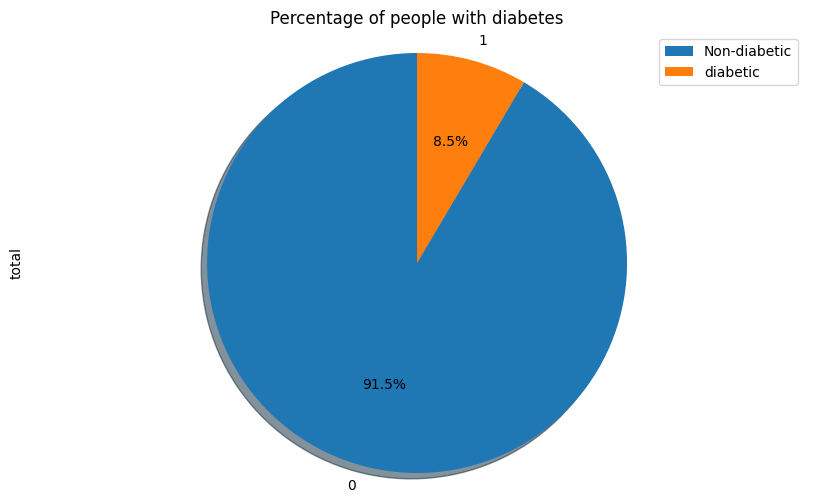

In [89]:
# visuals:
df_pie = data.groupby('diabetes')['gender'].count().reset_index().rename(columns={'gender':'total'})

# plot the chat
df_pie['total'].plot(kind='pie',
                     figsize=(10,6),
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True)

plt.title('Percentage of people with diabetes')
plt.axis('equal')
plt.legend(labels=['Non-diabetic', 'diabetic'], loc='upper right')
plt.show()


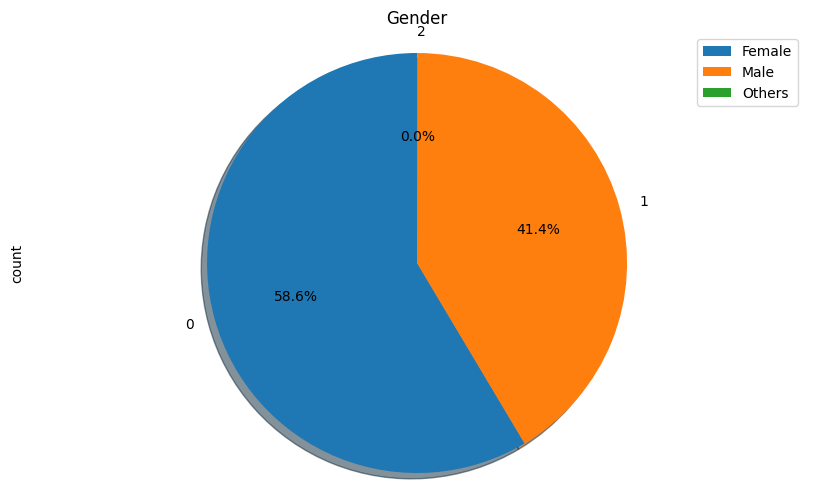

In [90]:
gender = data.groupby('gender')['diabetes'].count().reset_index().rename(columns = {'diabetes': 'count'})
gender['count'].plot(kind = 'pie', 
                    figsize = (10, 6), 
                    autopct = '%1.1f%%',
                    startangle = 90, 
                    shadow = True)
plt.title('Gender')
plt.axis('equal')
plt.legend(['Female', 'Male', 'Others'], loc = 'upper right')
plt.show()

In [91]:
data.groupby(['gender','diabetes'])['bmi'].count().reset_index().rename(columns = {'bmi':'count'})

,gender,diabetes,count
0,Female,0,54085
1,Female,1,4461
2,Male,0,37383
3,Male,1,4039
4,Other,0,18


[]

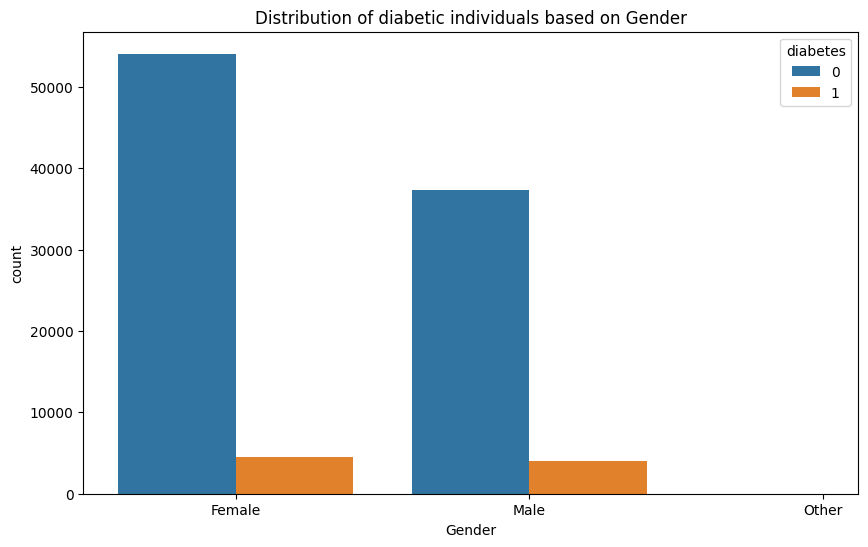

In [92]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'gender', hue = 'diabetes')
plt.title('Distribution of diabetic individuals based on Gender')
plt.xlabel('Gender')
plt.plot()

In [93]:
## looking into the smoking feature

data.smoking_history.value_counts().reset_index()

,smoking_history,count
0,No Info,35806
1,never,35091
2,former,9352
3,current,9286
4,not current,6447
5,ever,4004


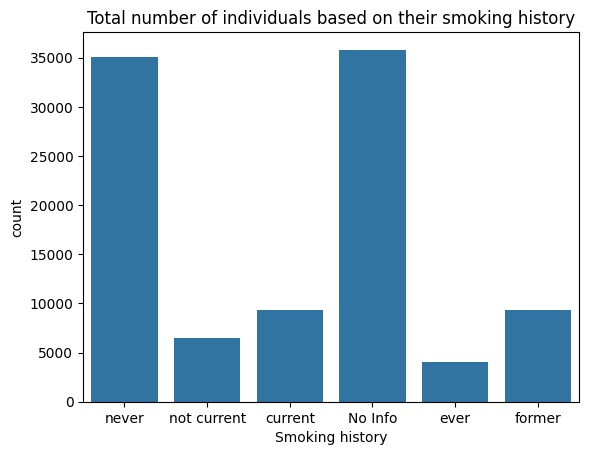

In [94]:
# visualized:plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'smoking_history')
plt.title('Total number of individuals based on their smoking history')
plt.xlabel('Smoking history')
plt.show()

In [95]:
data.groupby(['smoking_history','diabetes'])['bmi'].count().reset_index().rename(columns = {'bmi':'total'})

,smoking_history,diabetes,total
0,No Info,0,34352
1,No Info,1,1454
2,current,0,8338
3,current,1,948
4,ever,0,3532
5,ever,1,472
6,former,0,7762
7,former,1,1590
8,never,0,31745
9,never,1,3346


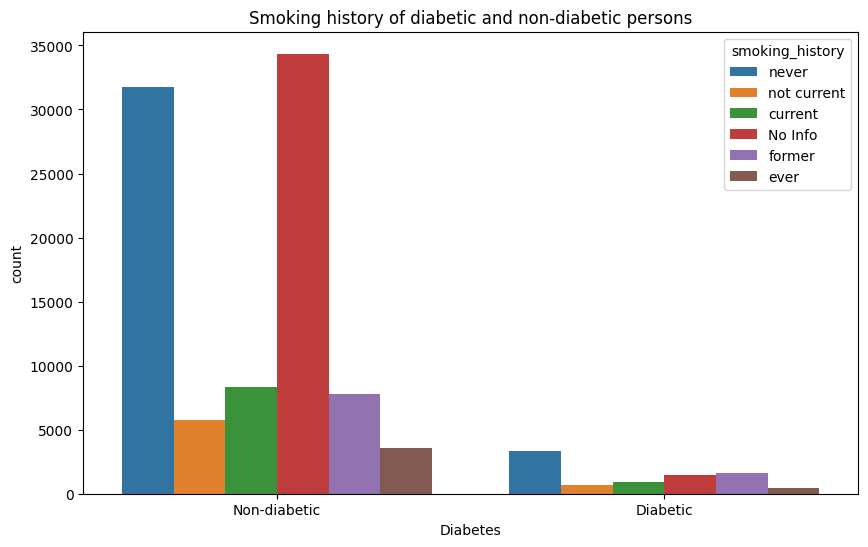

In [96]:
# if visualized
plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'diabetes', hue = 'smoking_history')
plt.title('Smoking history of diabetic and non-diabetic persons')
plt.xlabel('Diabetes')
plt.xticks(ticks = [0, 1], labels = ['Non-diabetic', 'Diabetic'])
plt.show()

There is no discernable pattern in the number of diabetic and non-diabetic individuals based on their smoking history

## Feature Evaluation

In [98]:
# transform the data i.e use the label encoder to transform categorical data into numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])

In [99]:
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])
data

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32.0,Alabama,0,0,0,0,1,0,0,4,27.32,5.0,100,0
1,2015,0,29.0,Alabama,0,1,0,0,0,0,0,4,19.95,5.0,90,0
2,2015,1,18.0,Alabama,0,0,0,0,1,0,0,4,23.76,4.8,160,0
3,2015,1,41.0,Alabama,0,0,1,0,0,0,0,4,27.32,4.0,159,0
4,2016,0,52.0,Alabama,1,0,0,0,0,0,0,4,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,0,33.0,Wyoming,0,0,0,0,1,0,0,4,21.21,6.5,90,0
99996,2016,0,80.0,Wyoming,0,1,0,0,0,0,0,0,36.66,5.7,100,0
99997,2018,1,46.0,Wyoming,0,1,0,0,0,0,0,2,36.12,6.2,158,0
99998,2018,0,51.0,Wyoming,1,0,0,0,0,0,0,5,29.29,6.0,155,0


In [100]:
# drop unnecessary columns
data.drop(columns = ['year', 'location'], axis = 1, inplace = True)
data

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,32.0,0,0,0,0,1,0,0,4,27.32,5.0,100,0
1,0,29.0,0,1,0,0,0,0,0,4,19.95,5.0,90,0
2,1,18.0,0,0,0,0,1,0,0,4,23.76,4.8,160,0
3,1,41.0,0,0,1,0,0,0,0,4,27.32,4.0,159,0
4,0,52.0,1,0,0,0,0,0,0,4,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,33.0,0,0,0,0,1,0,0,4,21.21,6.5,90,0
99996,0,80.0,0,1,0,0,0,0,0,0,36.66,5.7,100,0
99997,1,46.0,0,1,0,0,0,0,0,2,36.12,6.2,158,0
99998,0,51.0,1,0,0,0,0,0,0,5,29.29,6.0,155,0


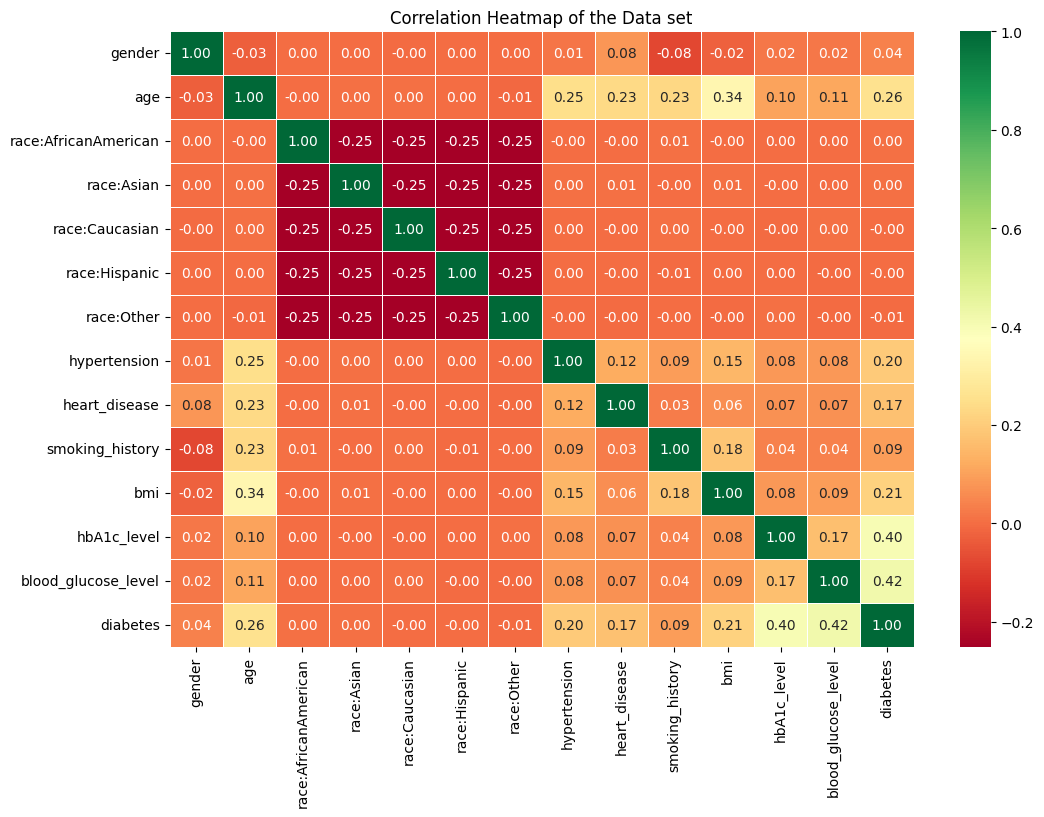

In [101]:
# determine the correlation between features
corr = data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Heatmap of the Data set')
plt.show()

### Modeling

In [103]:
# transform the data
features = data.columns.tolist()
print(features[:-1])
X = data[features[:-1]]
y = data['diabetes'].values.ravel()


['gender', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level']


***Evaluate features with RandomForestClassifier***

In [104]:
# determing importance of different features:
# to achieve this I used random forest classifier algorithm

from sklearn.ensemble import RandomForestClassifier

seed = 7
model = RandomForestClassifier(random_state=seed)
model.fit(X, y)
print(model.feature_importances_)

[0.00696222 0.09513579 0.00451044 0.00471741 0.00461437 0.00461515
 0.00409511 0.0167556  0.01154476 0.02867436 0.10809558 0.40481985
 0.30545936]


Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree, where the larger the score, the more important the feature.
We can plot the impurity-based importance to get a better summary of which of our features had the highest feature importance score.

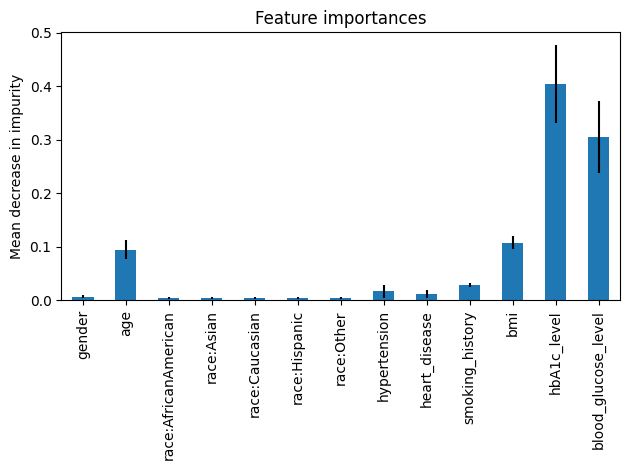

In [105]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(model.feature_importances_, index=features[:-1])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()


The bars suggest that the top 3 highest scoring features as:
- **blood_glucose_level**
- **hbA1c_level**
- **bmi**

***evaluate features with ExtraTreeClassifier**

In [106]:
# Feature Importance with ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=seed)
model.fit(X,y)

print(model.feature_importances_)

[0.00882658 0.11899492 0.00329353 0.00361979 0.00350742 0.00356311
 0.00309804 0.02372005 0.01761071 0.03538818 0.11589259 0.34569975
 0.31678533]


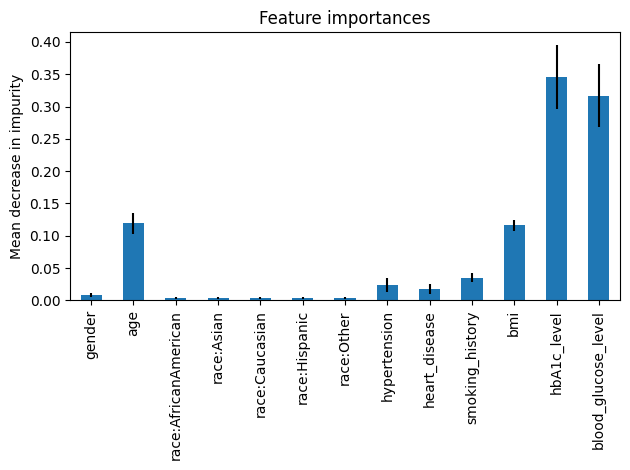

In [107]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(model.feature_importances_, index=features[:-1])

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

In [ ]:
Again the plot suggest that the top 3 highest scoring features as:
- **blood_glucose_level**
- **hbA1c_level**
- **bmi**

### retransform the data based on the 3 main performing features
With the highest performing feature as blood_glucose_level, hbA1c_level, bmi, let's transform the dataset to leverage on the 3 main features

In [108]:
n_features = ['bmi','hbA1c_level', 'blood_glucose_level']
X = data[n_features]
y = data['diabetes'].values.ravel()

In [110]:
# split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42)


## Selecting a model

3 classification models were used on the dataset, the one with the highest accuracy mean score compared. the model with the highest accuracy mean was selected. These are:
- LogisticRsegressionClassifier
- RandomForestClassifier
- VotingClassifier
all from sklearn

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# prepare the models
log_clf = LogisticRegression(solver='lbfgs', random_state=42)
dec_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
vot_clf = VotingClassifier(
    estimators=[('lr',log_clf), ('df',dec_clf), ('rf',rnd_clf)],
    voting='soft'
    )


for clf in (log_clf, dec_clf,rnd_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))






LogisticRegression 0.9583950074008881
DecisionTreeClassifier 0.9557146857622915
RandomForestClassifier 0.9619954394527344
VotingClassifier 0.9643957274872985


## classification report
in addition to the accuracy score, I evaluated the classification report of each model was evaluated.

In [118]:
from sklearn.metrics import classification_report

for clf in (log_clf, dec_clf, rnd_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,"\n", classification_report(y_test, y_pred))
    

LogisticRegression 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     22821
           1       0.91      0.58      0.71      2176

    accuracy                           0.96     24997
   macro avg       0.94      0.79      0.84     24997
weighted avg       0.96      0.96      0.95     24997

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     22821
           1       0.75      0.73      0.74      2176

    accuracy                           0.96     24997
   macro avg       0.86      0.85      0.86     24997
weighted avg       0.95      0.96      0.96     24997

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     22821
           1       0.83      0.71      0.77      2176

    accuracy                           0.96     24997
   macro avg       0.90      0.85      0.87     24997
wei

All classifiers show high accuracy, largely due to the performance on class 0, which has a much higher support.
Class 1, being the minority class, is where models differ in performance. Logistic Regression struggles more with recall, while Decision Tree and Random Forest show better balance. The Voting Classifier offers a slight improvement in precision for class 1.

As a result the VotingClassifier model is the best performing model for this dataset

## Tuning the Model

the random search approach was used to tune 

In [124]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


# Set the parameter grid for the individual models
param_grid = {
    'lr__C': uniform(loc=0.01, scale=10),  # Tune C for Logistic Regression
    'rf__n_estimators': [50, 100, 200],  # Number of trees in Random Forest
    'rf__max_depth': [None, 10, 20, 30],  # Max depth for Random Forest
    'df__max_depth': [None, 10, 20, 30],  # Max depth for Decision Tree
}

# Set a random seed for reproducibility
seed = 7

rsearch = RandomizedSearchCV(
    estimator=vot_clf,
    param_distributions=param_grid,
    n_iter=100,
    random_state=seed,
    n_jobs=-1,  # Use all available cores
    cv=5,  # 5-fold cross-validation
)

# Fit the randomized search to the data
rsearch.fit(X, y)

# Output the results
print("Best score:", rsearch.best_score_)
print("Recommended hyperparameters:", rsearch.best_params_)

Best score: 0.9718960599365433
Recommended hyperparameters: {'df__max_depth': 10, 'lr__C': np.float64(7.945699982974799), 'rf__max_depth': 10, 'rf__n_estimators': 200}


As seen in the above code, Voting Classifier correctly predicted the outcome for approximately 97.19% of the test samples with the best hyperparameters found.

## Saving and loading the model
The model was saved in the data folder.

In [125]:
from pickle import dump
from pickle import load

#save the model
filename = './finalised_model.sav'

model = vot_clf
print("Saving", filename)
dump(model, open(filename, 'wb'))


Saving ./finalised_model.sav
